# 1. Data Understanding

#### 🐢 Team: Terraria

## Initial Data Collection

The dataset is represented in JSON format.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [2]:
def load_dataset(filepath, limit=None):
    reсords_list = []
    with open(filepath, "r") as f:
        for i, line in enumerate(f):
            if limit and i >= limit:
                break
            record = json.loads(line)
            reсords_list.append(record)
    return reсords_list

In [3]:
path_to_file = "/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json"
dataset = load_dataset(path_to_file)
print(f"Number of loaded records: {len(dataset)}")

Number of loaded records: 2725401


In [4]:
df = pd.DataFrame(dataset)
df.head(5)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


## Data Description

The dataset consists of 14 features each of object type.

The number of records presented in the dataset is 2725401.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725401 entries, 0 to 2725400
Data columns (total 14 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   submitter       object
 2   authors         object
 3   title           object
 4   comments        object
 5   journal-ref     object
 6   doi             object
 7   report-no       object
 8   categories      object
 9   license         object
 10  abstract        object
 11  versions        object
 12  update_date     object
 13  authors_parsed  object
dtypes: object(14)
memory usage: 291.1+ MB


### Column meaning

| **Column**      | **Description**                                                                                                       |
|-----------------|-----------------------------------------------------------------------------------------------------------------------|
| **id**          | ArXiv ID                                                                            |
| **submitter**   | The name of the person who submitted the paper                                                                                               |
| **authors**     | Authors of the paper                                                                                                  |
| **title**       | Title of the paper                                                                                                    |
| **comments**    | Additional info, such as number of pages and figures                                                                   |
| **journal-ref** | Information about the journal the paper was published in                                                               |
| **doi**         | Digital Object Identifier                                                                      |
| **abstract**    | The abstract of the paper                                                                                             |
| **categories**  | Categories / tags in the ArXiv system                                                                                 |
| **versions**    | A version history                                                                                                     |

In [6]:
df.isnull().sum()

id                      0
submitter           15189
authors                 0
title                   0
comments           709032
journal-ref       1834820
doi               1487316
report-no         2540336
categories              0
license            452784
abstract                0
versions                0
update_date             0
authors_parsed          0
dtype: int64

For the task of identifying co-authors, the key article attributes are authors, title, abstract, and categories. These features are essential for analyzing papers presented in the dataset and uncovering collaboration patterns. The absence of missing values in these columns confirms the dataset's suitability for this task.

## Data Exploration

In [7]:
def plot_distribution(given_df, given_column, given_title=None):
    plt.figure(figsize=(10, 6))
    given_df[given_column].value_counts().sort_index().plot(
        kind="bar", color="royalblue"
    )
    if given_title is None:
        given_title = f"Distribution of {given_column}"
    plt.title(given_title)
    plt.xlabel(given_column)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

In [8]:
def plot_series_counts(given_series, given_y_label=None, given_title=None):
    plt.figure(figsize=(16, 8))
    sns.barplot(x=given_series.values, y=given_series.index, palette="viridis")
    if given_title is not None:
        plt.title(given_title)
    plt.xlabel("Count")
    if given_y_label is not None:
        plt.ylabel(given_y_label)
    plt.show()

#### Duplicates
The number of unique ids is less than the number of records. Therefore, there are duplicates that must be cleaned.

In [9]:
num_of_unique_id = len(df["id"].unique())
print(f"Number of unique ids: {num_of_unique_id}")

Number of unique ids: 2725378


In [10]:
# create a copy of the dataframe and convert the data into string to use duplicated()
df_copy = df.copy()
columns_list = list(df_copy.columns)
for column in columns_list:
    df_copy[column] = df_copy[column].astype(str)
print(f"Num of duplicates: {df_copy.duplicated().sum()}")

Num of duplicates: 10


In [11]:
df_copy[df_copy.duplicated(keep=False)]

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
2611355,math-ph/0509047,Detlev Buchholz,Detlev Buchholz and Wojciech Dybalski,Scattering in relativistic quantum field theor...,"15 pages, no figures. v2: A revised and update...",None,None,None,math-ph hep-th math.MP math.SP,http://arxiv.org/licenses/nonexclusive-distrib...,"We provide an overview of basic concepts, to...","[{'version': 'v1', 'created': 'Wed, 21 Sep 200...",2024-11-05,"[['Buchholz', 'Detlev', ''], ['Dybalski', 'Woj..."
2634044,math-ph/0702049,"Ingolf Sch\""afer","Ingolf Sch\""afer and Marek Ku\'s",Spectral statistics along sequences of irreduc...,"14 pages, 1 figure",None,None,None,math-ph math.MP math.RT,None,We discuss the nearest neighbor distribution...,"[{'version': 'v1', 'created': 'Wed, 14 Feb 200...",2024-08-21,"[['Schäfer', 'Ingolf', ''], ['Kuś', 'Marek', '']]"
2641916,math-ph/0512019,Vesselin Gueorguiev,"V. G. Gueorguiev, A. R. P. Rau, and J. P. Draayer",Confined One Dimensional Harmonic Oscillator a...,11 pages and 9 figures; Submitted to American ...,American Journal of Physics 74 (5) 394 (2006),10.1119/1.2173270,UCRL-JRNL-213847,math-ph hep-th math.MP quant-ph,None,The one-dimensional harmonic oscillator in a...,"[{'version': 'v1', 'created': 'Wed, 7 Dec 2005...",2024-04-19,"[['Gueorguiev', 'V. G.', ''], ['Rau', 'A. R. P..."
2646810,math-ph/0203043,Frederic Moulin,F.Moulin,Magnetic monopoles and Lorentz force,12 pages,"Nuovo Cim.B116:869-877,2001",None,None,math-ph math.MP,None,The formulation of a generalized classical e...,"[{'version': 'v1', 'created': 'Thu, 21 Mar 200...",2024-09-26,"[['Moulin', 'F.', '']]"
2648687,math-ph/0606001,Lewin Mathieu,"Christian Hainzl, Mathieu Lewin and Eric Sere",Existence of Atoms and Molecules in the Mean-F...,"Final version, to appear in Arch. Rat. Mech. Anal",Archive for Rational Mechanics and Analysis 19...,10.1007/s00205-008-0144-2,None,math-ph math.MP,None,The Bogoliubov-Dirac-Fock (BDF) model is the...,"[{'version': 'v1', 'created': 'Wed, 31 May 200...",2023-10-17,"[['Hainzl', 'Christian', ''], ['Lewin', 'Mathi..."
2654176,math-ph/0605055,Herintsitohaina Ratsimbarison,Herintsitohaina Ratsimbarison,Galilean relativity and its invariant bilinear...,"6 pages, typos corrected and text clarity impr...",None,None,None,math-ph math.MP,http://arxiv.org/licenses/nonexclusive-distrib...,We construct the family of bilinear forms gG...,"[{'version': 'v1', 'created': 'Thu, 18 May 200...",2024-02-21,"[['Ratsimbarison', 'Herintsitohaina', '']]"
2654974,math-ph/0702049,"Ingolf Sch\""afer","Ingolf Sch\""afer and Marek Ku\'s",Spectral statistics along sequences of irreduc...,"14 pages, 1 figure",None,None,None,math-ph math.MP math.RT,None,We discuss the nearest neighbor distribution...,"[{'version': 'v1', 'created': 'Wed, 14 Feb 200...",2024-08-21,"[['Schäfer', 'Ingolf', ''], ['Kuś', 'Marek', '']]"
2655300,math-ph/0512019,Vesselin Gueorguiev,"V. G. Gueorguiev, A. R. P. Rau, and J. P. Draayer",Confined One Dimensional Harmonic Oscillator a...,11 pages and 9 figures; Submitted to American ...,American Journal of Physics 74 (5) 394 (2006),10.1119/1.2173270,UCRL-JRNL-213847,math-ph hep-th math.MP quant-ph,None,The one-dimensional harmonic oscillator in a...,"[{'version': 'v1', 'created': 'Wed, 7 Dec 2005...",2024-04-19,"[['Gueorguiev', 'V. G.', ''], ['Rau', 'A. R. P..."
2655774,math-ph/0509047,Detlev Buchholz,Detlev Buchholz and Wojciech Dybalski,Scattering in relativistic quantum field theor...,"15 pages, no figures. v2: A revised and update...",None,None,None,math-ph hep-th math.MP math.SP,http://arxiv.org/licenses/nonexclusive-distrib...,"We provide an overview of basic concepts, to...","[{'version': 'v1', 'created': 'Wed, 21 Sep 200...",2024-11-05,"[['Buchholz', 'Detlev', ''], ['Dybalski', 'Woj..."
2656286,math-ph/0512019,Vesselin Gueorguiev,"V. G. Gueorguiev, A. R. P. Rau, and J. P. Draayer",Confined One Dimensional Harmonic Oscillator a...,11 page

In [12]:
duplicated_ids = df_copy[df_copy.duplicated(keep=False)]["id"]
duplicated_ids

2611355    math-ph/0509047
2634044    math-ph/0702049
2641916    math-ph/0512019
2646810    math-ph/0203043
2648687    math-ph/0606001
2654176    math-ph/0605055
2654974    math-ph/0702049
2655300    math-ph/0512019
2655774    math-ph/0509047
2656286    math-ph/0512019
2656597    math-ph/0203043
2656598    math-ph/0611044
2657647    math-ph/0605055
2661911    math-ph/0509047
2661912    math-ph/0605055
2661914    math-ph/0611044
2662831    math-ph/0606001
Name: id, dtype: object

In [13]:
# drop duplicates
print(f"Shape before cleaning {df.shape}")
df = df[~df.duplicated(subset="id", keep="first") | ~df["id"].isin(duplicated_ids)]
print(f"Shape after cleaning {df.shape}")

Shape before cleaning (2725401, 14)
Shape after cleaning (2725385, 14)


### Categories

### Getting category names from [Category Taxonomy page](https://arxiv.org/category_taxonomy)

Since categories are represented as codes, we retrieved the category names from the official arXiv Category Taxonomy page and mapped the codes to the categoty names.

In [14]:
response = requests.get("https://arxiv.org/category_taxonomy")

if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    taxonomy_div = soup.find("div", id="category_taxonomy_list")
    category_code_2_name = {}

    # h2 tags represent father categories
    next_categories = taxonomy_div.find_all(
        ["h2", "h3"], class_=["accordion-head", "column is-one-fifth"]
    )

    # Iterate over each father category
    for next_category in next_categories:
        # get category name
        next_category_name = next_category.text.strip()

        # find sub-categories
        sub_categories = next_category.find_next_sibling().find_all("h4")
        for sub_category in sub_categories:
            # get sub-category name
            sub_category_name = sub_category.text.strip()
            # get sub-category code
            sub_category_code = sub_category_name.split()[0]

            # append the retrieved data
            category_code_2_name[sub_category_code] = next_category_name
    print("Extracted categories")
    print("Number of extracted categories", len(category_code_2_name))
    print(category_code_2_name)
else:
    print(f"Error getting data {response.status_code}")

Extracted categories
Number of extracted categories 155
{'cs.AI': 'Computer Science', 'cs.AR': 'Computer Science', 'cs.CC': 'Computer Science', 'cs.CE': 'Computer Science', 'cs.CG': 'Computer Science', 'cs.CL': 'Computer Science', 'cs.CR': 'Computer Science', 'cs.CV': 'Computer Science', 'cs.CY': 'Computer Science', 'cs.DB': 'Computer Science', 'cs.DC': 'Computer Science', 'cs.DL': 'Computer Science', 'cs.DM': 'Computer Science', 'cs.DS': 'Computer Science', 'cs.ET': 'Computer Science', 'cs.FL': 'Computer Science', 'cs.GL': 'Computer Science', 'cs.GR': 'Computer Science', 'cs.GT': 'Computer Science', 'cs.HC': 'Computer Science', 'cs.IR': 'Computer Science', 'cs.IT': 'Computer Science', 'cs.LG': 'Computer Science', 'cs.LO': 'Computer Science', 'cs.MA': 'Computer Science', 'cs.MM': 'Computer Science', 'cs.MS': 'Computer Science', 'cs.NA': 'Computer Science', 'cs.NE': 'Computer Science', 'cs.NI': 'Computer Science', 'cs.OH': 'Computer Science', 'cs.OS': 'Computer Science', 'cs.PF': 'Compu

#### Analyzing splitted categories

In the dataset, some papers are assigned multiple categories in a single cell. To understand the frequency of each category, we split them for separate analysis. Then, we examined the original multi-category assignments to understand how categories are grouped in papers.

In [15]:
df["splitted_categories"] = df["categories"].str.split()
df_exploded = df.explode("splitted_categories")
df_exploded.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,splitted_categories
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...",hep-ph
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]",math.CO
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]",cs.CG
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]",physics.gen-ph
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]",math.CO


In [16]:
# map category code to category name
df_exploded["category_name"] = (
    df_exploded["splitted_categories"].map(category_code_2_name).fillna("Not-defined")
)
df_exploded.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,splitted_categories,category_name
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...",hep-ph,Physics
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]",math.CO,Mathematics
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]",cs.CG,Computer Science
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]",physics.gen-ph,Physics
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]",math.CO,Mathematics


In [17]:
category_name_counts = df_exploded["category_name"].value_counts()
category_name_counts

category_name
Physics                                       2105415
Computer Science                              1137583
Mathematics                                    943141
Statistics                                     156814
Not-defined                                    132202
Electrical Engineering and Systems Science     107599
Quantitative Biology                            55401
Quantitative Finance                            26384
Economics                                       12385
Name: count, dtype: int64

`Physics` category is most common field of research, followed by `Computer Science` and `Mathematics`

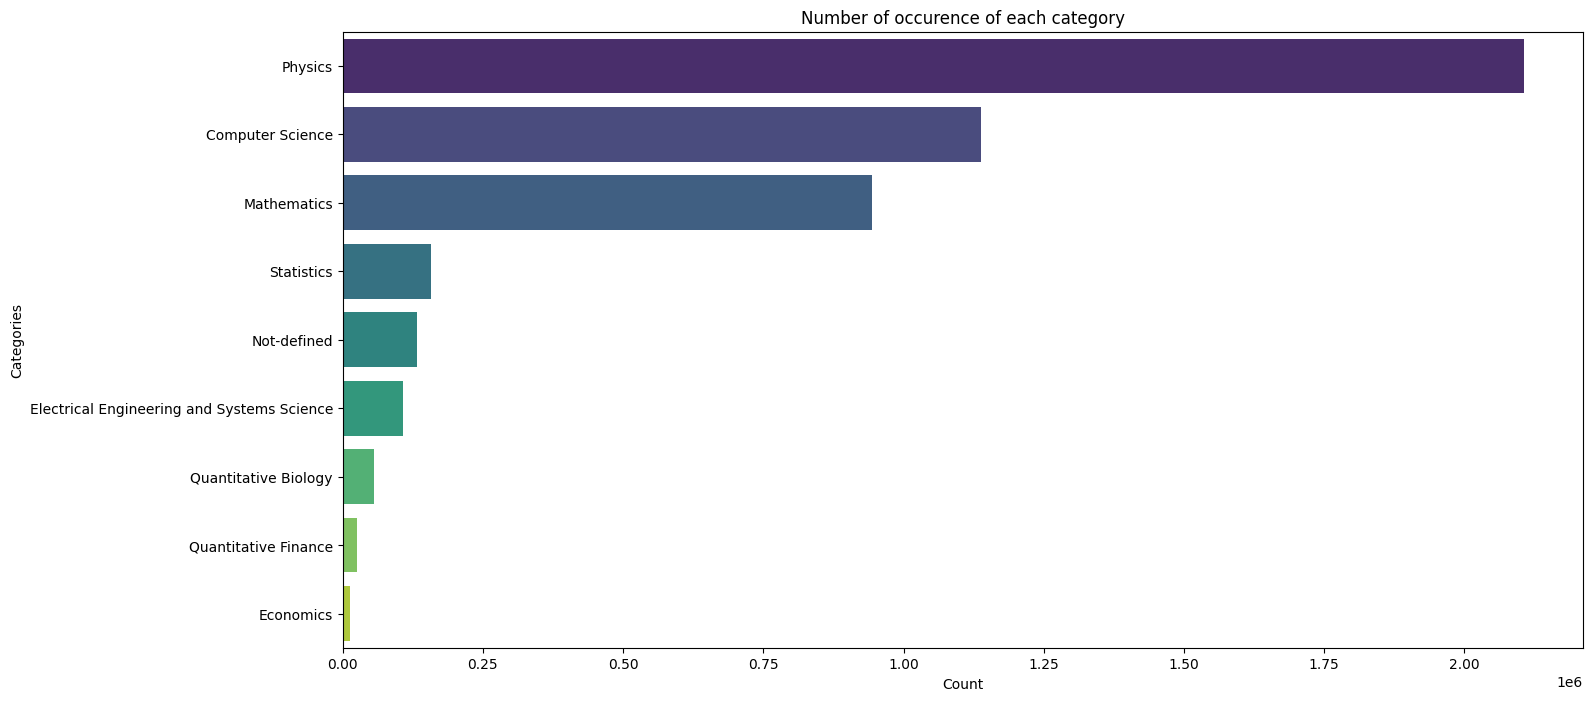

In [18]:
ylabel = "Categories"
title = "Number of occurence of each category"
plot_series_counts(category_name_counts, ylabel, title)

In [19]:
# not defined codes
records_with_not_defined_category = df_exploded[
    df_exploded["category_name"] == "Not-defined"
]
records_with_not_defined_category

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,splitted_categories,category_name
8,0704.0009,Paul Harvey,"Paul Harvey, Bruno Merin, Tracy L. Huard, Luis...","The Spitzer c2d Survey of Large, Nearby, Inste...",None,"Astrophys.J.663:1149-1173,2007",10.1086/518646,None,astro-ph,None,We discuss the results from the combined IRA...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2010-03-18,"[[Harvey, Paul, ], [Merin, Bruno, ], [Huard, T...",astro-ph,Not-defined
16,0704.0017,Nceba Mhlahlo,"Nceba Mhlahlo, David H. Buckley, Vikram S. Dhi...",Spectroscopic Observations of the Intermediate...,"10 pages, 11 figures (figures 3, 4, 7 and 8 at...","Mon.Not.Roy.Astron.Soc.378:211-220,2007",10.1111/j.1365-2966.2007.11762.x,None,astro-ph,None,Results from spectroscopic observations of t...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2009-06-23,"[[Mhlahlo, Nceba, ], [Buckley, David H., ], [D...",astro-ph,Not-defined
22,0704.0023,Maria Loukitcheva,"M. A. Loukitcheva, S. K. Solanki and S. White",ALMA as the ideal probe of the solar chromosphere,"4 pages, 2 figures, to appear in the proceedin...","Astrophys.Space Sci.313:197-200,2008",10.1007/s10509-007-9626-1,None,astro-ph,None,"The very nature of the solar chromosphere, i...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2009-06-23,"[[Loukitcheva, M. A., ], [Solanki, S. K., ], [...",astro-ph,Not-defined
43,0704.0044,Alexander Schekochihin,"A. A. Schekochihin (Oxford), S. C. Cowley (Cul...",Astrophysical gyrokinetics: kinetic and fluid ...,"aastex using emulateapj, 65 pages, 10 figures;...","ApJS 182, 310 (2009)",10.1088/0067-0049/182/1/310,None,astro-ph nlin.CD physics.plasm-ph physics.spac...,http://arxiv.org/licenses/nonexclusive-distrib...,We present a theoretical framework for plasm...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2015-05-13,"[[Schekochihin, A. A., , Oxford], [Cowley, S. ...",astro-ph,Not-defined
47,0704.0048,Alexander Stroeer,"Alexander Stroeer, John Veitch, Christian Roev...",Inference on white dwarf binary systems using ...,"GWDAW-11 proceeding, submitted to CQG, 10 page...","Class.Quant.Grav.24:S541-S550,2007",10.1088/0264-9381/24/19/S17,None,gr-qc astro-ph,None,We report on the analysis of selected single...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-11-26,"[[Stroeer, Alexander, ], [Veitch, John, ], [Ro...",astro-ph,Not-defined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725396,supr-con/9608008,Ruslan Prozorov,"R. Prozorov, M. Konczykowski, B. Schmidt, Y. Y...",On the origin of the irreversibility line in t...,"19 pages, LaTex, 6 PostScript figures; Author'...",None,10.1103/PhysRevB.54.15530,None,supr-con cond-mat.supr-con,None,We report on measurements of the angular dep...,"[{'version': 'v1', 'created': 'Mon, 26 Aug 199...",2009-10-30,"[[Prozorov, R., ], [Konczykowski, M., ], [Schm...",supr-con,Not-defined
2725397,supr-con/9609001,Durga P. Choudhury,"Durga P. Choudhury, Balam A. Willemsen, John S...",Nonlinear Response of HTSC Thin Film Microwave...,"4 pages, LaTeX type, Uses IEEE style files, 60...",None,10.1109/77.620744,None,supr-con cond-mat.supr-con,None,The non-linear microwave surface impedance o...,"[{'version': 'v1', 'created': 'Sat, 31 Aug 199...",2016-11-18,"[[Choudhury, Durga P., , Physics Department, N...",supr-con,Not-defined
2725398,supr-con/9609002,Durga P. Choudhury,"Balam A. Willemsen, J. S. Derov and S.Sridhar ...",Critical State Flux Penetration and Linear Mic...,"20 pages, LaTeX type, Uses REVTeX style files,...",None,10.1103/PhysRevB.56.11989,None,supr-con cond-mat.supr-con,None,The vortex contribution to the dc field (H) ...,"[{'version': 'v1', 'created': 'Tue, 3 Sep 1996...",2009-10-30,"[[Willemsen, Balam A., , Physics Department,\n...",supr-con,Not-defined
2725399,supr-con/9609003,Hasegawa Yasumasa,Yasumasa Hasegawa (Himeji Institute of Technol...,Density of States and NMR Relaxation Rate in A...,"7 pag

In [20]:
records_with_not_defined_category["splitted_categories"].unique()

array(['astro-ph', 'acc-phys', 'adap-org', 'q-bio', 'cond-mat',
       'chao-dyn', 'patt-sol', 'dg-ga', 'solv-int', 'bayes-an',
       'comp-gas', 'alg-geom', 'funct-an', 'q-alg', 'ao-sci', 'atom-ph',
       'chem-ph', 'plasm-ph', 'mtrl-th', 'cmp-lg', 'supr-con'],
      dtype=object)

#### Analyzing original categories

We analyzed the categories as they appeared in the dataset to understand common category combinations and how they are assigned to papers.

In [21]:
def map_categories(categories):
    category_names = {
        category_code_2_name.get(cat, "Not-defined") for cat in categories.split()
    }
    return ", ".join(category_names)

In [22]:
df["mapped_categories"] = df["categories"].apply(map_categories)
df.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,splitted_categories,mapped_categories
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...",[hep-ph],Physics
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]","[math.CO, cs.CG]","Mathematics, Computer Science"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]",[physics.gen-ph],Physics
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]",[math.CO],Mathematics
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]","[math.CA, math.FA]",Mathematics


In [23]:
category_counts = df["mapped_categories"].value_counts()
category_counts

mapped_categories
Physics                                                                                                    1179266
Computer Science                                                                                            466230
Mathematics                                                                                                 438277
Physics, Mathematics                                                                                         97882
Not-defined                                                                                                  96721
                                                                                                            ...   
Economics, Electrical Engineering and Systems Science, Quantitative Finance                                      1
Physics, Statistics, Computer Science, Quantitative Finance, Electrical Engineering and Systems Science          1
Quantitative Biology, Economics, Mathematics, Quantitative Fin

`Physics`, `Computer Science` and `Mathematics` categories remain dominant, even when considering multi-category assignments. `Physics` is the most prevalent field, while interdisciplinary research often involves combinations of `Mathematics`, `Computer Science`, and `Physics`

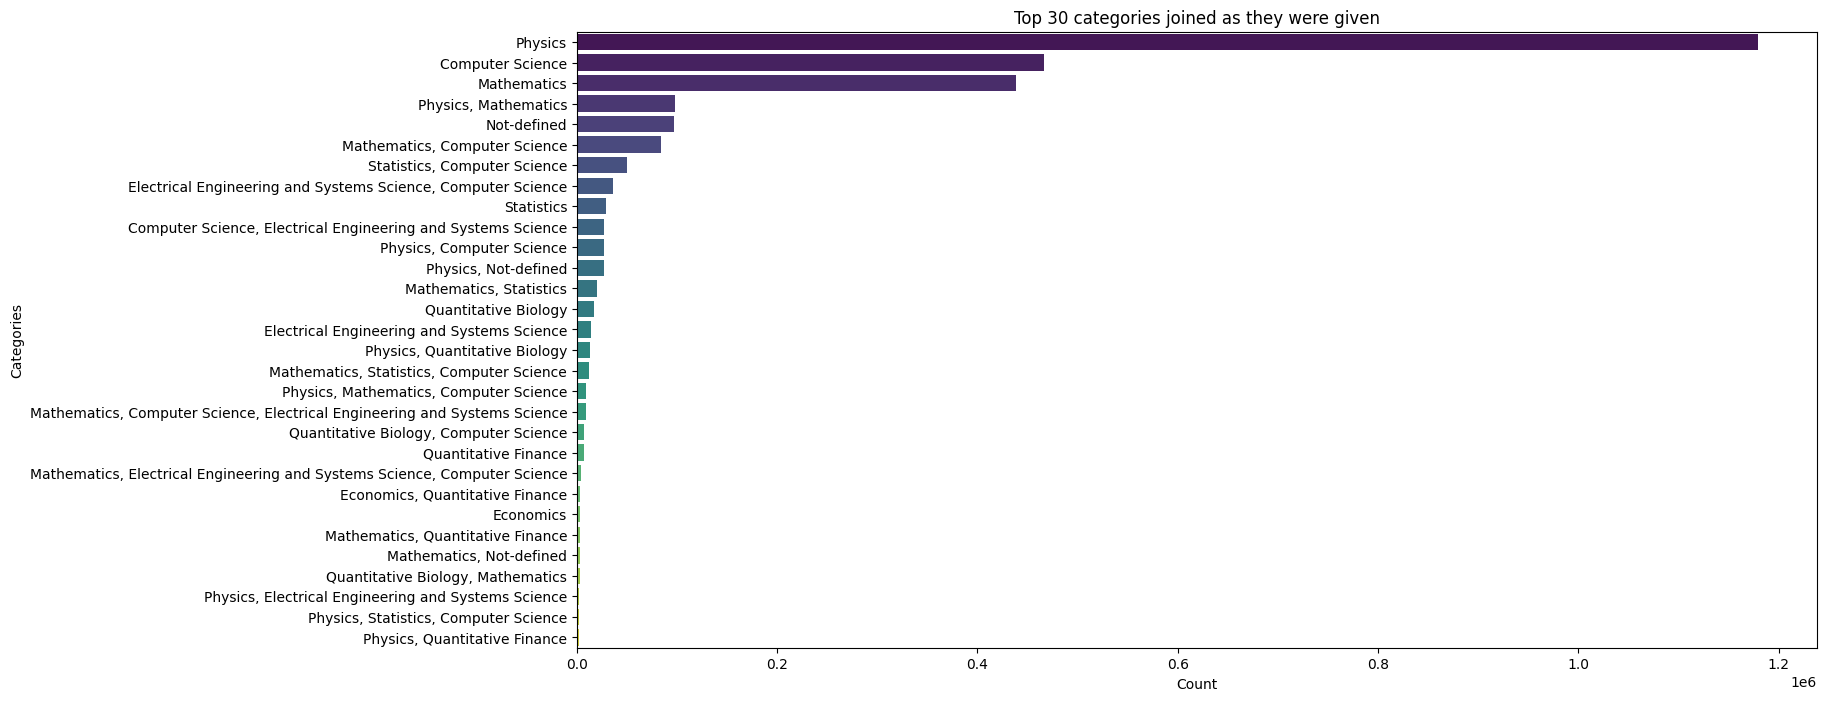

In [24]:
top_30_categories = category_counts.head(30)
title = "Top 30 categories joined as they were given"
y_label = "Categories"
plot_series_counts(top_30_categories, y_label, title)


### Update date

In [25]:
print(f"The minimum update date is {df['update_date'].min()}")
print(f"The maxium update date is {df['update_date'].max()}")

The minimum update date is 2007-05-23
The maxium update date is 2025-05-02


In [26]:
df["update_date"] = pd.to_datetime(df["update_date"])
df["year"] = df["update_date"].dt.year

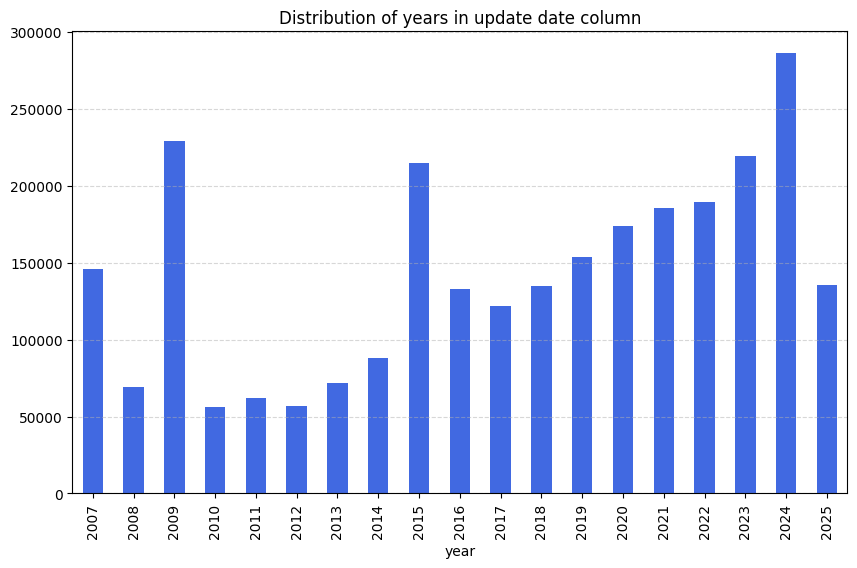

In [27]:
year_title = "Distribution of years in update date column"
plot_distribution(df, "year", year_title)

### Authors

In [28]:
def get_num_of_authors(list_of_authors):
    return len(list_of_authors)

In [29]:
df["num_of_authors"] = df["authors_parsed"].apply(get_num_of_authors)
df.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,splitted_categories,mapped_categories,year,num_of_authors
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...",[hep-ph],Physics,2008,4
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]","[math.CO, cs.CG]","Mathematics, Computer Science",2008,2
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]",[physics.gen-ph],Physics,2008,1
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]",[math.CO],Mathematics,2007,1
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]","[math.CA, math.FA]",Mathematics,2013,2


In [30]:
df["num_of_authors"].describe()

count    2.725385e+06
mean     4.601101e+00
std      2.289973e+01
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      2.832000e+03
Name: num_of_authors, dtype: float64

In [31]:
authors_counts = df["num_of_authors"].value_counts()
authors_counts

num_of_authors
2      661466
3      563219
1      513611
4      356089
5      208182
        ...  
524         1
551         1
550         1
471         1
724         1
Name: count, Length: 1014, dtype: int64

In [32]:
# paper with the maximum number of authors
max_num_of_authors = df["num_of_authors"].max()
df[df["num_of_authors"] == max_num_of_authors]

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,splitted_categories,mapped_categories,year,num_of_authors
574385,1411.4413,Marc-Olivier Bettler,The CMS and LHCb Collaborations: V. Khachatrya...,Observation of the rare $B^0_s\to\mu^+\mu^-$ d...,Correspondence should be addressed to\n cms-a...,"Nature 522, 68-72 (04 June 2015)",10.1038/nature14474,"CERN-PH-EP-2014-220, CMS-BPH-13-007, LHCb-PAPE...",hep-ex hep-ph,http://creativecommons.org/licenses/by/4.0/,A joint measurement is presented of the bran...,"[{'version': 'v1', 'created': 'Mon, 17 Nov 201...",2016-08-10,"[[CMS, The, ], [Collaborations, LHCb, ], [:, ,...","[hep-ex, hep-ph]",Physics,2016,2832


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


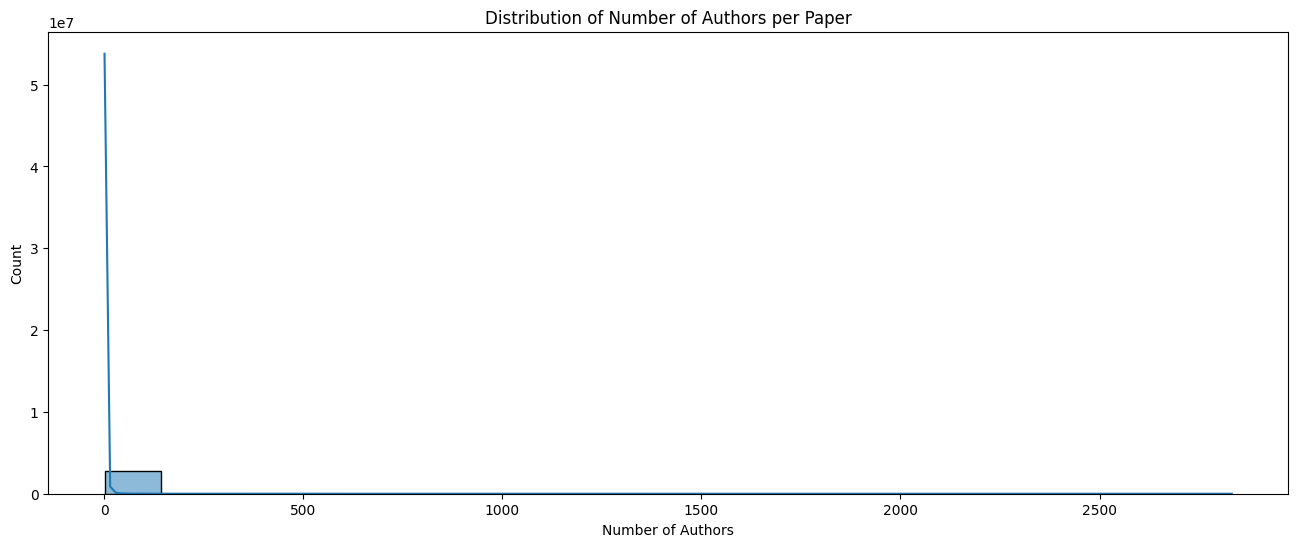

In [33]:
plt.figure(figsize=(16, 6))
sns.histplot(df["num_of_authors"], bins=20, kde=True)
plt.title("Distribution of Number of Authors per Paper")
plt.xlabel("Number of Authors")
plt.ylabel("Count")
plt.show()

Most papers have a relatively small number of authors (IQR  is very narrow), a few papers involve massive collaborations

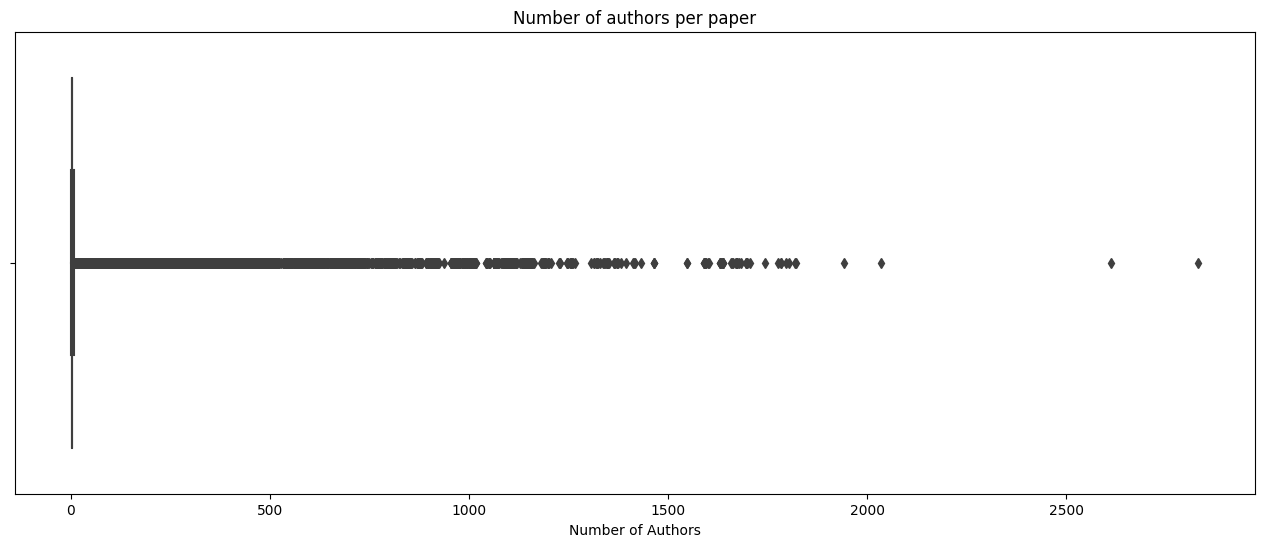

In [34]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df["num_of_authors"])
plt.title("Number of authors per paper")
plt.xlabel("Number of Authors")
plt.show()

The following plot demonstrates the existence of upward trend in the average number of authors per paper over time, meaning that scientific collaboration is increasing. 
ResearchGate can leverage this by implementing a coauthor recommendation system to promote cooperation, increase user engagement and attract investors.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


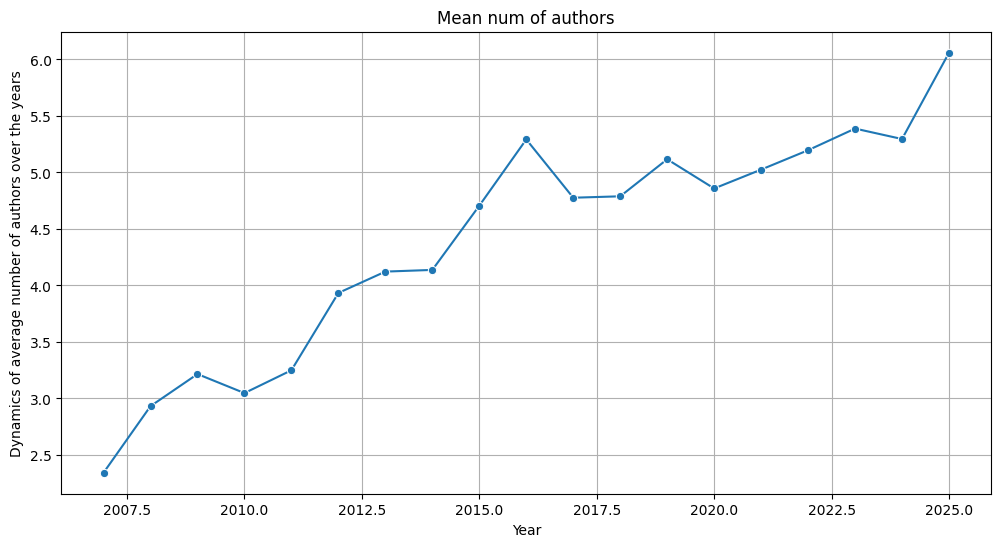

In [35]:
year_trends = df.groupby("year")["num_of_authors"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=year_trends, x="year", y="num_of_authors", marker="o")
plt.title("Mean num of authors")
plt.xlabel("Year")
plt.ylabel("Dynamics of average number of authors over the years")
plt.grid(True)
plt.show()

### Data Quality Verification
We have encountered several data quality problems

- **Duplicates**: Some entries share the same paper ID, indicating that duplicates exist in the dataset.
- **Outlier papers with extreme author counts**: A few papers list over 2,000 authors, which can skew statistical distributions and graph construction.

# 2. Data Preparation

In [36]:
!pip install torch_geometric -qq
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import os
import pickle
import numpy as np
import pandas as pd
import networkx as nx
import torch
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModel
import torch_geometric.utils as utils
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score
from random import sample


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.0 MB/s eta 0:00:00a 0:00:01
Using device: cuda


## Select Data

Filter dataset to only include Computer Science papers and select relevant columns

In [37]:
df = df[["id", "title", "authors_parsed", "mapped_categories", "update_date"]]

In [38]:
df = df[df["mapped_categories"].str.contains("Computer Science")].copy()

In [39]:
print(len(df))

753369


In [40]:
df

,id,title,authors_parsed,mapped_categories,update_date
1,0704.0002,Sparsity-certifying Graph Decompositions,"[[Streinu, Ileana, ], [Theran, Louis, ]]","Mathematics, Computer Science",2008-12-13
45,0704.0046,A limit relation for entropy and channel capac...,"[[Csiszar, I., ], [Hiai, F., ], [Petz, D., ]]","Physics, Mathematics, Computer Science",2009-11-13
46,0704.0047,Intelligent location of simultaneously active ...,"[[Kosel, T., ], [Grabec, I., ]]",Computer Science,2009-09-29
49,0704.0050,Intelligent location of simultaneously active ...,"[[Kosel, T., ], [Grabec, I., ]]",Computer Science,2007-05-23
61,0704.0062,On-line Viterbi Algorithm and Its Relationship...,"[[Šrámek, Rastislav, ], [Brejová, Broňa, ], [V...",Computer Science,2010-01-25
...,...,...,...,...,...
2724115,quant-ph/9909094,Quantum Computation and Quadratically Signed W...,"[[Knill, E., ], [Laflamme, R., ]]","Physics, Computer Science",2007-05-23
2724148,quant-ph/9910033,Almost-Everywhere Superiority for Quantum Comp...,"[[Hemaspaandra, Edith, , RIT], [Hemaspaandra, ...","Physics, Computer Science",2007-05-23
2724202,quant-ph/9910087,Unconditionally Secure Commitment of a Certifi...,"[[Kent, Adrian, , DAMTP, University of Cambrid...","Physics, Computer Science",2009-10-31
2724283,quant-ph/9911043,Cheat Sensitive Quantum Bit Commitment,"[[Hardy, Lucien, , The Perimeter Institute], [...","Physics, Computer Science",2009-10-31


## Integrate Data

### Category mapping

We already performed the category code-to-name mapping in the data understanding stage.

## Construct Data

### Author’s name as FirstName LastName

Let's store author names in the format “FirstName LastName” for consistency.

In [41]:
df["authors_list"] = df["authors_parsed"].apply(
    lambda lst: [" ".join(a[:2]).strip() for a in lst]
)
df = df.reset_index(drop=True)

In [42]:
all_authors = [auth for lst in df["authors_list"] for auth in lst]
author_counts = Counter(all_authors)
counts = np.array(list(author_counts.values()))
print(f"Total unique authors: {len(set(all_authors))}")
print(f"Total papers: {len(df)}")

Total unique authors: 723457
Total papers: 753369


## Clean Data

### Duplicates removal
We already removed duplicate records in the data understanding stage.

### Filtering authors and papers by activity
We keep only authors with a reasonable number of papers (between 1 and 500) and remove papers where any author falls outside this range.

In [43]:
print(
    f"Before filter: unique authors = {len(author_counts)}, min papers = {counts.min()}, max papers = {counts.max()}"
)
lower, upper = 1, 500
keep_authors = {auth for auth, cnt in author_counts.items() if lower <= cnt <= upper}
print(
    f"Keeping {len(keep_authors)} authors (removed {len(author_counts) - len(keep_authors)})"
)

Before filter: unique authors = 723457, min papers = 1, max papers = 1550
Keeping 723419 authors (removed 38)


In [44]:
before_papers = len(df)
df = df[
    df["authors_list"].apply(lambda lst: all(a in keep_authors for a in lst))
].reset_index(drop=True)
print(f"Papers before: {before_papers}, after: {len(df)}")

Papers before: 753369, after: 729171


In [45]:
new_authors = [a for lst in df["authors_list"] for a in lst]
new_counts = np.array(list(Counter(new_authors).values()))
print(
    f"After filter: unique authors = {len(set(new_authors))}, min papers = {new_counts.min()}, max papers = {new_counts.max()}"
)

After filter: unique authors = 711501, min papers = 1, max papers = 441


### Filtering papers by number of authors
We keep only papers that have a reasonable number of authors (between 1 and 20).

In [46]:
df["num_authors"] = df["authors_list"].apply(len)
print(
    f"Pre-filter: min authors = {df['num_authors'].min()}, max authors = {df['num_authors'].max()}"
)

Pre-filter: min authors = 1, max authors = 1109


In [47]:
lower, upper = 1, 20
df = df[(df["num_authors"] >= lower) & (df["num_authors"] <= upper)].copy()
print(
    f"Post-filter: min authors = {df['num_authors'].min()}, max authors = {df['num_authors'].max()}"
)

Post-filter: min authors = 1, max authors = 20


In [48]:
from dateutil.relativedelta import relativedelta

df["update_date"] = pd.to_datetime(df["update_date"])

max_date = df["update_date"].max()
test_start = max_date - relativedelta(months=1)
val_start = test_start - relativedelta(months=1)
train_start = val_start - relativedelta(months=4)

df_train = df[
    (df["update_date"] >= train_start) & (df["update_date"] < val_start)
].reset_index(drop=True)
df_val = df[
    (df["update_date"] >= val_start) & (df["update_date"] < test_start)
].reset_index(drop=True)
df_test = df[
    (df["update_date"] >= test_start) & (df["update_date"] <= max_date)
].reset_index(drop=True)

print(f"Train period: {train_start.date()} → {val_start.date()},  N={len(df_train)}")
print(f"Val   period: {val_start.date()} → {test_start.date()},  N={len(df_val)}")
print(f"Test  period: {test_start.date()} → {max_date.date()},  N={len(df_test)}")

Train period: 2024-11-02 → 2025-03-02,  N=51955
Val   period: 2025-03-02 → 2025-04-02,  N=19177
Test  period: 2025-04-02 → 2025-05-02,  N=17369


## Format Data

In [49]:
author2idx = {}
G = nx.Graph()
for _, row in df_train.iterrows():
    for auth in row["authors_list"]:
        if auth not in author2idx:
            author2idx[auth] = len(author2idx)
        G.add_node(auth)
for _, row in df_train.iterrows():
    authors = row["authors_list"]
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            u, v = authors[i], authors[j]
            if G.has_edge(u, v):
                G[u][v]["weight"] += 1
            else:
                G.add_edge(u, v, weight=1)
print(f"Train graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

Train graph: 135410 nodes, 509193 edges


# 3. Modeling

## Caching title embeddings with SciBERT
In this step, we compute semantic embeddings for article titles using the SciBERT model, which is well-suited for scientific text. To avoid recomputing these embeddings every time, we process the titles in batches, extract the sentence-level representations, and save them in a local cache file keyed by article ID.

In [50]:
cache_path = "title_embeddings.pkl"
train_ids = df_train["id"].tolist()
if os.path.exists(cache_path):
    print("Loading cached title embeddings")
    with open(cache_path, "rb") as f:
        title_emb = pickle.load(f)
else:
    print("Cache not found. Computing title embeddings...")
    tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
    sci_model = AutoModel.from_pretrained("allenai/scibert_scivocab_uncased").to(device)
    hid = sci_model.config.hidden_size
    title_emb = {}
    batch_size = 64
    titles = df_train["title"].tolist()
    for i in tqdm(range(0, len(titles), batch_size), desc="Embedding titles"):
        batch_texts = titles[i : i + batch_size]
        toks = tokenizer(
            batch_texts,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=64,
        ).to(device)
        with torch.no_grad():
            out = sci_model(**toks)
        vecs = out.last_hidden_state[:, 0, :].cpu().numpy()
        for j, vec in enumerate(vecs):
            art_id = train_ids[i + j]
            title_emb[art_id] = vec
    with open(cache_path, "wb") as f:
        pickle.dump(title_emb, f)
    print(f"Cached {len(title_emb)} title embeddings to {cache_path}")

Cache not found. Computing title embeddings...


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/228k [00:00<?, ?B/s]

2025-05-10 20:22:17.437105: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746908537.671027      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746908537.740681      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]


Embedding titles: 100%|██████████| 812/812 [00:47<00:00, 17.23it/s]


Cached 51955 title embeddings to title_embeddings.pkl


### Preparing PyG node features from title embeddings
In this step, we prepare the node features for the PyTorch Geometric (PyG) graph. For each author node, we aggregate the SciBERT title embeddings of all papers they have coauthored (from the training set) by averaging them into a single feature vector. This results in a dense node feature matrix, where each row corresponds to an author, and the features capture the semantic content of their published work. These representations will be used as input to the graph neural network.

In [51]:
hid = next(iter(title_emb.values())).shape[0]
num_nodes = G.number_of_nodes()

node_feats = np.zeros((num_nodes, hid), dtype=float)
author_embs = {auth: [] for auth in G.nodes()}
for _, row in tqdm(df_train.iterrows(), total=len(df_train), desc="Processing rows"):
    vec = title_emb[row["id"]]
    for auth in row["authors_list"]:
        author_embs[auth].append(vec)
for auth, nidx in tqdm(
    author2idx.items(), total=len(author2idx), desc="Averaging node embeddings"
):
    embs = author_embs[auth]
    if embs:
        node_feats[nidx] = np.mean(embs, axis=0)

Averaging node embeddings: 100%|██████████| 135410/135410 [00:02<00:00, 46561.13it/s]


### Preparing PyG edges and edge features
In this step, we construct the edge list and associated features for the coauthorship graph. For each paper in the training set, we identify all unique author pairs (coauthor relationships) and map them to their corresponding node indices. We collect the list of papers associated with each author pair so that later we can compute average title embeddings per edge. The resulting edge list represents undirected coauthorship connections, capturing the collaborative relationships between authors in the graph.

In [52]:
edges = []
edge_papers = {}
for _, row in tqdm(df_train.iterrows(), total=len(df_train), desc="Processing rows"):
    aid = row["id"]
    for i in range(len(row["authors_list"])):
        for j in range(i + 1, len(row["authors_list"])):
            u, v = row["authors_list"][i], row["authors_list"][j]
            ui, vi = author2idx[u], author2idx[v]
            if ui > vi:
                ui, vi = vi, ui
            edges.append((ui, vi))
            edge_papers.setdefault((ui, vi), []).append(aid)
edges = list(set(edges))
edge_tit = []
for ui, vi in tqdm(edges, desc="Computing edge title features"):
    ids = edge_papers[(ui, vi)]
    vs = [title_emb[i] for i in ids]
    edge_tit.append(np.mean(vs, axis=0))
edge_tit = np.vstack(edge_tit)

Computing edge title features: 100%|██████████| 509193/509193 [00:09<00:00, 52676.19it/s]


### Assembling PyG Data object

In [53]:
to_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
edge_index = torch.cat([to_index, to_index.flip(0)], dim=1)
edge_attr_title = torch.tensor(np.vstack([edge_tit, edge_tit]), dtype=torch.float)

data = Data(
    x=torch.tensor(node_feats, dtype=torch.float).to(device),
    edge_index=edge_index.to(device),
    edge_attr_title=edge_attr_title.to(device),
)
print(data)

Data(x=[135410, 768], edge_index=[2, 1018386], edge_attr_title=[1018386, 768])


### Preparing positive edges for train, validation, and test
We create positive author pairs (coauthorships) for each split:
- Train: all known pairs from training data
- Validation: only pairs among train authors, from next-year papers
- Test: only pairs among train + val authors, from later papers

In [54]:
train_edges = edges
train_pos = torch.tensor(train_edges, dtype=torch.long).t().to(device)
train_authors = set(author2idx.keys())

val_pairs = []
for _, row in tqdm(df_val.iterrows(), total=len(df_val), desc="Val positives"):
    auths = [a for a in row["authors_list"] if a in train_authors]
    for i in range(len(auths)):
        for j in range(i + 1, len(auths)):
            ui, vi = author2idx[auths[i]], author2idx[auths[j]]
            if ui > vi:
                ui, vi = vi, ui
            val_pairs.append((ui, vi))
val_pos = torch.tensor(list(set(val_pairs)), dtype=torch.long).view(2, -1).to(device)

val_authors = {a for lst in df_val["authors_list"] for a in lst} & train_authors
test_authors = train_authors | val_authors
test_pairs = []
for _, row in tqdm(df_test.iterrows(), total=len(df_test), desc="Test positives"):
    auths = [a for a in row["authors_list"] if a in test_authors]
    for i in range(len(auths)):
        for j in range(i + 1, len(auths)):
            ui, vi = author2idx[auths[i]], author2idx[auths[j]]
            if ui > vi:
                ui, vi = vi, ui
            test_pairs.append((ui, vi))
test_pos = torch.tensor(list(set(test_pairs)), dtype=torch.long).view(2, -1).to(device)

Test positives: 100%|██████████| 17369/17369 [00:00<00:00, 22911.05it/s]


### Building undirected graph and sampling negative pairs
We make the edge index undirected (for message passing)
and sample random negative pairs for each split, without forbidden edge checks


In [55]:
train_ei = torch.cat([train_pos, train_pos.flip(0)], dim=1)

def sample_negatives(authors, k):
    negs = set()
    authors = list(authors)
    while len(negs) < k:
        u, v = sample(authors, 2)
        ui, vi = author2idx[u], author2idx[v]
        if ui > vi:
            ui, vi = vi, ui
        negs.add((ui, vi))
    return torch.tensor(list(negs), dtype=torch.long).t().to(device)


n_train = train_pos.size(1)
n_val = val_pos.size(1)
n_test = test_pos.size(1)

train_neg = sample_negatives(train_authors, n_train)
val_neg = sample_negatives(train_authors, n_val)
test_neg = sample_negatives(test_authors, n_test)

### Attaching splits to PyG Data object
We attach all positive and negative edge indices to the Data object for model training and evaluation

In [56]:
data.train_edge_index = train_ei
data.train_pos_edge_index = train_pos
data.train_neg_edge_index = train_neg
data.val_pos_edge_index = val_pos
data.val_neg_edge_index = val_neg
data.test_pos_edge_index = test_pos
data.test_neg_edge_index = test_neg

print(f"Splits sizes → train: {n_train}, val: {n_val}, test: {n_test}")

Splits sizes → train: 509193, val: 84291, test: 66332


### Defining the GraphSAGE-based link prediction model
This model uses multiple SAGEConv layers to encode node features,
then combines the embeddings of node pairs and edge attributes (like title embeddings)
through an MLP to predict the likelihood of a link between nodes.

In [57]:
class GraphSAGE_LinkPredictor(nn.Module):
    def __init__(self, in_ch, hid_ch, layers, dp):
        super().__init__()
        self.convs = nn.ModuleList(
            [SAGEConv(in_ch, hid_ch)]
            + [SAGEConv(hid_ch, hid_ch) for _ in range(layers - 1)]
        )
        self.dp = dp
        feat_dim = (
            hid_ch * 2 + in_ch
        )  # combined feature dimension: node_u, node_v, edge_attr
        self.mlp = nn.Sequential(
            nn.Linear(feat_dim, hid_ch), nn.ReLU(), nn.Linear(hid_ch, 1)
        )

    def encode(self, x, ei):
        for c in self.convs:
            x = F.relu(c(x, ei))
            x = F.dropout(x, p=self.dp, training=self.training)
        return x

    def decode(self, z, ep, ea):
        u, v = ep
        h = torch.cat([z[u], z[v], ea], dim=1)
        return self.mlp(h).squeeze()

    def forward(self, x, ei, ep, ea):
        return self.decode(self.encode(x, ei), ep, ea)


### Training and evaluation functions
- train_ep: runs one training epoch by computing positive and negative link losses
- eval_auc: evaluates the model by computing ROC-AUC on the specified split (train/val/test)

In [58]:
def train_ep(m, opt):
    m.train()
    opt.zero_grad()
    p = data.train_pos_edge_index.size(1)
    pos = m(
        data.x,
        data.train_edge_index,
        data.train_pos_edge_index,
        data.edge_attr_title[:p],
    )
    neg = m(
        data.x,
        data.train_edge_index,
        data.train_neg_edge_index,
        data.edge_attr_title[p : p + data.train_neg_edge_index.size(1)],
    )
    loss = F.binary_cross_entropy_with_logits(
        pos, torch.ones_like(pos)
    ) + F.binary_cross_entropy_with_logits(neg, torch.zeros_like(neg))
    loss.backward()
    opt.step()
    return loss.item()


@torch.no_grad()
def eval_auc(m, split):
    m.eval()
    pos = getattr(data, f"{split}_pos_edge_index")
    neg = getattr(data, f"{split}_neg_edge_index")
    p, n = pos.size(1), neg.size(1)
    ps = m(data.x, data.train_edge_index, pos, data.edge_attr_title[:p])
    ns = m(data.x, data.train_edge_index, neg, data.edge_attr_title[p : p + n])
    y = np.concatenate([np.ones(p), np.zeros(n)])
    sc = torch.cat([ps, ns]).cpu().numpy()
    return roc_auc_score(y, sc)


### Hyperparameter tuning loop
We search over hidden size, number of layers, dropout, and learning rate,
training each configuration for 20 epochs and selecting the one with the best validation ROC-AUC.

In [59]:
params = {
    "hidden_channels": [64, 128],
    "num_layers": [2, 3],
    "dropout": [0, 0.3, 0.5],
    "lr": [1e-3, 5e-4],
}
best = (0, None)
epochs = 30
for hc in params["hidden_channels"]:
    for nl in params["num_layers"]:
        for dp in params["dropout"]:
            for lr in params["lr"]:
                m = GraphSAGE_LinkPredictor(hid, hc, nl, dp).to(device)
                opt = torch.optim.Adam(m.parameters(), lr=lr)
                for _ in range(epochs):
                    train_ep(m, opt)
                a = eval_auc(m, "val")
                print(f"{hc},{nl},{dp},{lr}→{a:.4f}")
                if a > best[0]:
                    best = (a, (hc, nl, dp, lr))
print("Best Val AUC", best)

64,2,0,0.001→0.6888
64,2,0,0.0005→0.6968
64,2,0.3,0.001→0.6734
64,2,0.3,0.0005→0.7019
64,2,0.5,0.001→0.6768
64,2,0.5,0.0005→0.7005
64,3,0,0.001→0.6930
64,3,0,0.0005→0.7088
64,3,0.3,0.001→0.7026
64,3,0.3,0.0005→0.7193
64,3,0.5,0.001→0.6732
64,3,0.5,0.0005→0.7013
128,2,0,0.001→0.6515
128,2,0,0.0005→0.6998
128,2,0.3,0.001→0.6775
128,2,0.3,0.0005→0.6875
128,2,0.5,0.001→0.6678
128,2,0.5,0.0005→0.6848
128,3,0,0.001→0.7035
128,3,0,0.0005→0.7072
128,3,0.3,0.001→0.7057
128,3,0.3,0.0005→0.6961
128,3,0.5,0.001→0.6988
128,3,0.5,0.0005→0.7045
Best Val AUC (0.7193311780307463, (64, 3, 0.3, 0.0005))


### Final model training on the best hyperparameters
We retrain the model for 20 epochs using the best found configuration, then evaluate its ROC-AUC on the test set.

In [60]:
hc, nl, dp, lr = best[1]
m = GraphSAGE_LinkPredictor(hid, hc, nl, dp).to(device)
opt = torch.optim.Adam(m.parameters(), lr=lr)
for _ in range(epochs):
    train_ep(m, opt)
print("Test ROC-AUC:", eval_auc(m, "test"))

Test ROC-AUC: 0.6945483252524186


### Compute MRR on test set
This function calculates the ranking quality of the model's top-K recommendations by measuring where the true positive appears among K candidates.

In [61]:
@torch.no_grad()
def compute_mrr(z, pos, neg, K=10):
    total_reciprocal_rank = 0.0
    P = pos.size(1)

    for i in range(P):
        u = pos[0, i].item()
        v = pos[1, i].item()
        cand = neg[1][neg[0] == u]
        if cand.size(0) >= K - 1:
            negs = cand[: K - 1]
        else:
            negs = torch.randint(0, num_nodes, (K - 1,), device=device)

        src = torch.full((K,), u, dtype=torch.long, device=device)
        dst = torch.cat([torch.tensor([v], device=device), negs])
        scores = (z[src] * z[dst]).sum(dim=1)

        _, ranking = torch.sort(scores, descending=True)
        rank = (ranking == 0).nonzero(as_tuple=False).item() + 1

        total_reciprocal_rank += 1.0 / rank

    return total_reciprocal_rank / P


with torch.no_grad():
    z = m.encode(data.x, data.train_edge_index)

mrr = compute_mrr(z, data.test_pos_edge_index, data.test_neg_edge_index, K=10)
print(f"MRR: {mrr:.4f}")

MRR: 0.2602


### Saving and loading the trained model
We save the model’s state_dict to a file and reload it into a fresh model instance for inference.

In [62]:
model_path = "gnn_link_predictor.pth"
torch.save(m.state_dict(), model_path)
print("Model state_dict saved to:", model_path)

idx2author = {idx: author for author, idx in author2idx.items()}
author_list = list(author2idx.keys())
print("\nFirst 5 authors (unordered list):")
print(author_list[:5])

loaded_model = GraphSAGE_LinkPredictor(in_ch=hid, hid_ch=hc, layers=nl, dp=dp).to(device)
loaded_model.load_state_dict(torch.load(model_path, map_location=device, weights_only=True))
loaded_model.eval()

Model state_dict saved to: gnn_link_predictor.pth

First 5 authors (unordered list):
['Croll Grenville J.', 'Butler Raymond J.', 'Grossman Thomas A.', 'Price D.', 'Weber Brandon']


GraphSAGE_LinkPredictor(
  (convs): ModuleList(
    (0): SAGEConv(768, 64, aggr=mean)
    (1-2): 2 x SAGEConv(64, 64, aggr=mean)
  )
  (mlp): Sequential(
    (0): Linear(in_features=896, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
)

### Defining recommendation function
Given an author, we rank all other authors by predicted coauthorship likelihood (logits) using the trained GraphSAGE model.

In [63]:
def recommend_for_author(author_name, topk=10):
    u = author2idx[author_name]
    with torch.no_grad():
        z = loaded_model.encode(data.x, data.edge_index)  # [N, hid]
    # candidates
    all_vs = torch.arange(z.size(0), device=device)
    cand_vs = all_vs[all_vs != u]  # [N-1]
    # synthetic edge features
    src = u * torch.ones_like(cand_vs)
    edge_pairs = torch.stack([src, cand_vs], dim=0)      # [2, N-1]
    ea = 0.5 * (data.x[u].unsqueeze(0) + data.x[cand_vs])  # [N-1, hid]
    # score 
    with torch.no_grad():
        logits = loaded_model.decode(z, edge_pairs, ea)  # [N-1]
    # pick top-k
    top_logits, top_idx = torch.topk(logits, min(topk, logits.size(0)))
    top_vs = cand_vs[top_idx]
    # build recommendations
    recs = [(idx2author[int(v)], float(s)) for v, s in zip(top_vs, top_logits)]
    return recs

### Save for inference

In [67]:
m_cpu = m.to("cpu")
torch.save(m_cpu.state_dict(), "gnn_link_predictor.pth")
print("Saved model weights → gnn_link_predictor.pth")

with open("author_mappings.pkl", "wb") as f:
    pickle.dump({"author2idx": author2idx, "idx2author": idx2author}, f)
print("Saved author mappings → author_mappings.pkl")

torch.save(data.x, "node_features.pt")
print("Saved node features → node_features.pt")

torch.save(data.edge_index, "edge_index.pt")
print("Saved edge index → edge_index.pt")

Saved model weights → gnn_link_predictor.pth
Saved author mappings → author_mappings.pkl
Saved node features → node_features.pt
Saved edge index → edge_index.pt
